In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from parser.chromatogram import Chromatogram

In [2]:
filepath = Path("data/IgG Vtag 1_ACQUITY FLR ChA.txt")
chromatogram = Chromatogram(filepath)
chromatogram.raw_data.head()

,Time (min),Step (s),Value (EU)
0,0.000000,NaN,0.000000
1,0.008333,0.5,-0.000477
2,0.016667,0.5,-0.001914
3,0.025000,0.5,-0.004258
4,0.033333,0.5,-0.007188


In [3]:
chromatogram.raw_data.describe()

,Time (min),Step (s),Value (EU)
count,7801.000000,7800.0,7801.000000
mean,32.500000,0.5,0.033386
std,18.767492,0.0,0.809756
min,0.000000,0.5,-0.301133
25%,16.250000,0.5,-0.244493
50%,32.500000,0.5,-0.166758
75%,48.750000,0.5,0.018789
max,65.000000,0.5,23.390665


In [4]:
# Detect peaks
chromatogram.detect_peaks()
chromatogram.get_peaks_df().head()

,Peak Start Measurement Id,Peak End Time Measurement Id,Peak Height (EU),Retention Time (s),Peak Area
0,81,111,2.351414,0.841667,0.494429
1,81,173,9.750574,1.025000,2.455102
2,135,189,2.008668,1.158333,0.870584
3,195,257,3.949376,1.966667,1.054105
4,1911,2011,8.014949,16.341667,1.511206


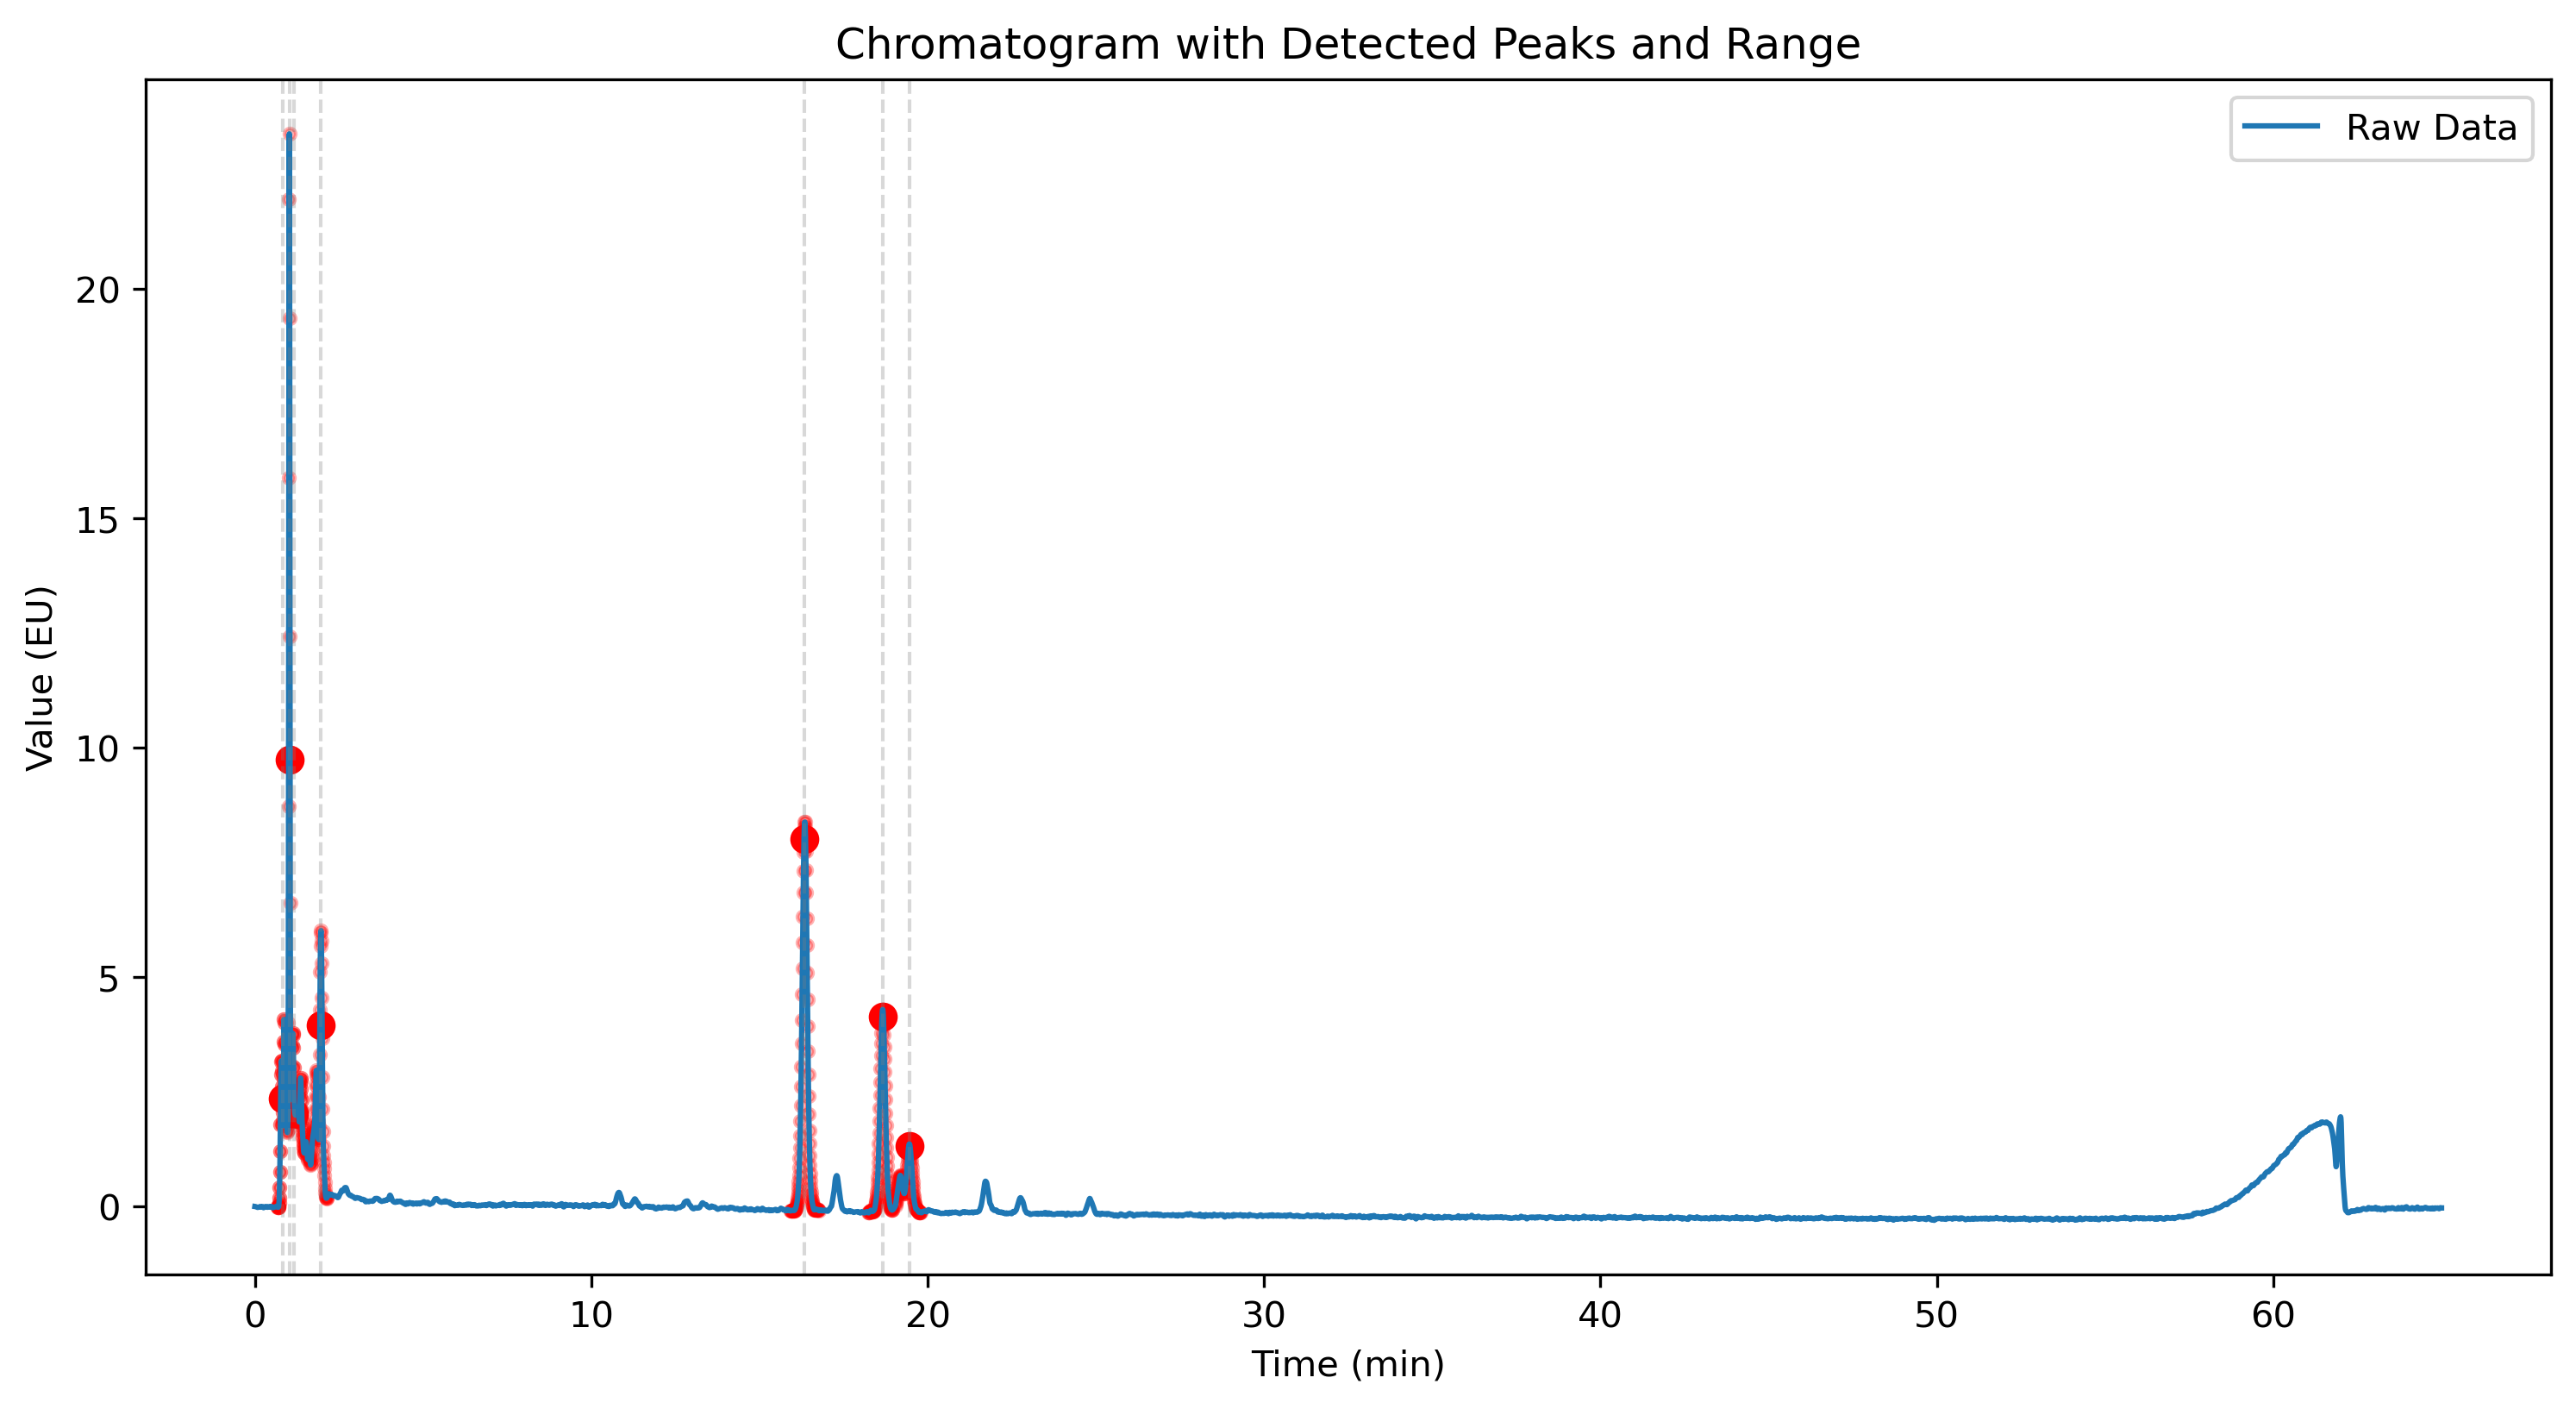

In [5]:
# Display raw data with detected peaks
plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(
    x=chromatogram.raw_data["Time (min)"],
    y=chromatogram.raw_data["Value (EU)"],
    label="Raw Data",
)

# Plot each peak and its range
for peak in chromatogram.peaks:
      # Larger marker for the peak point
    plt.scatter(
        peak.retention_time, peak.height, color="red", s=50
    )
    # Range of points within the peak
    peak_range = chromatogram.raw_data.iloc[
        peak.left_base_idx : peak.right_base_idx + 1
    ]
    # Smaller markers for the peak range
    plt.scatter(
        peak_range["Time (min)"], peak_range["Value (EU)"], color="red", s=10, alpha=0.3
    )

    # Vertical line at the retention time
    plt.axvline(
        x=peak.retention_time, color="gray", linestyle="--", linewidth=1, alpha=0.3
    )

plt.title("Chromatogram with Detected Peaks and Range")
plt.xlabel("Time (min)")
plt.ylabel("Value (EU)")
plt.legend()
plt.show()